# DataGeometry objects (`geo`)

The DataGeometry object is the hypertools data object class. A `geo` contains the data, figure handles, and transform functions used to create a plot. Note that this class should not be called directly, but is used by the hyp.plot function to create a plot object.

In this tutorial we will explore the features of a geo and how it may be used.

## Import Hypertools

In [1]:
import hypertools as hyp

%matplotlib inline

/usr/local/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## Load your data

In this case, we have used one of the sample datasets built into the package.

In [3]:
mushrooms = hyp.load('mushrooms')

We can peek at the first few rows of the dataframe using the pandas function `head`.

In [4]:
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Plot data

First, we will plot the data, generating a geo.

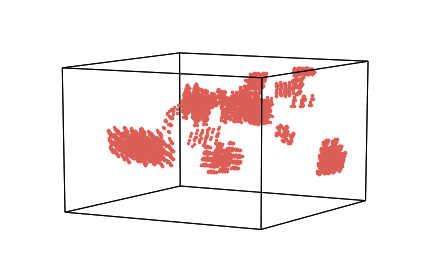

In [5]:
geo = hyp.plot(mushrooms, '.')

## Exploring the geo

### Hypertools version

The version field contains the version number of hypertools that the geo was generated with.

In [6]:
geo.version

'0.4.0'

### Data and plot

The data field contains the raw data.

In [8]:
geo.data

[array([[0, 1, 0, ..., 0, 1, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [1, 0, 1, ..., 0, 0, 0],
        ..., 
        [1, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0]], dtype=uint8)]

The `fig` field contains the figure itself.

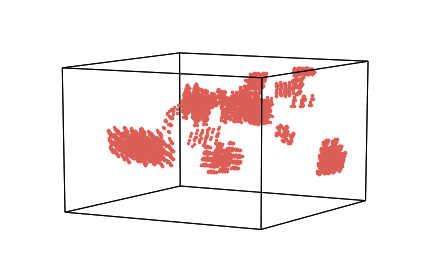

In [11]:
geo.fig

### Transformed data

The `xform_data` field contains the transformed data (in this case, the data was automatically reduced to 3 dimensions for plotting when we called `hyp.plot`).

In [12]:
geo.xform_data

[array([[ 0.66282511, -0.50030606,  1.60971357],
        [ 1.5395065 , -0.25964717,  1.89064114],
        [ 1.69285148, -0.2652148 ,  1.89496073],
        ..., 
        [ 0.68330896, -0.29900591,  0.38257187],
        [-1.47676276, -1.45182833, -0.16606786],
        [ 0.66276601, -0.3111866 ,  0.60080039]])]

### Normalize, reduce and align metadata

The `reduce`, `align` and `normalize` fields contain information about the model and parameters used in each of the  analyses.

In [16]:
print(geo.normalize)
print(geo.reduce)
print(geo.align)

None
{'model': 'IncrementalPCA', 'params': {'n_components': 3}}
{'model': None, 'params': {}}


### Plotting axes and animations

The `ax` and `line_ani` fields hold the plot axes and the animation setting (in this case None) for plotting, respectively.

In [17]:
geo.ax

In [18]:
geo.line_ani

## Plotting with geos

You can also generate a new plot (a new geo) from data stored in the geo using geo.plot.

This plotting feature accepts all of the keyword arguments supported by hypertools.plot.

First, let's plot without making any changes.

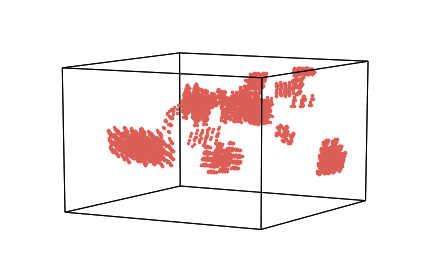

In [19]:
geo.plot()

Now, let's change the plot using some keyword arguments.

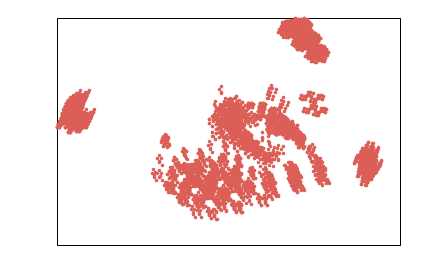

In [20]:
geo.plot(ndims = 2)

## Tranforming data using geos

An additional feature afforded by geos is the ability to later analyze other datasets using the same transformations performed on the original data in the geo. This allows for easy comparison of multiple datasets. Here, we load a built in dataset (the weights dataset) and apply the transform from the geo data to the first element of weights.

In [23]:
weights = hyp.load('weights_avg')
geo.transform(weights[0])

array([[  6.48068333e+00,   1.40102780e+00,   1.59104919e+00],
       [  2.84769726e+00,   8.96467865e-02,  -8.98378491e-02],
       [  1.48038733e+00,  -1.26063561e+00,  -7.48025596e-01],
       [  1.05186558e+00,  -1.31629324e+00,  -1.00285459e+00],
       [  7.00260162e-01,  -8.85070622e-01,  -9.83820438e-01],
       [  5.33612728e-01,  -7.32676804e-01,  -5.91460764e-01],
       [  2.62964189e-01,  -6.85500383e-01,  -6.77563190e-01],
       [  1.59012482e-01,  -6.71859443e-01,  -7.72416592e-01],
       [ -8.59968290e-02,  -6.79191232e-01,  -8.61991227e-01],
       [  1.36606023e-02,  -7.69169748e-01,  -1.20105219e+00],
       [  4.61160243e-01,  -1.01595330e+00,  -1.14419591e+00],
       [  6.45726144e-01,  -6.87333822e-01,  -8.25198054e-01],
       [  5.96288681e-01,  -6.04023159e-01,  -4.66835350e-01],
       [  5.54403141e-02,  -3.93152535e-01,  -2.82153070e-01],
       [ -8.27722907e-01,  -5.17250299e-01,  -3.39220464e-01],
       [ -7.25380301e-01,  -2.73191214e-01,  -2.0019578

## Saving geos

You can also easily save a geo using geo.save. The geo will save as a 'geo' file, which is a dictionary containing the elements of a data geometry object saved in the hd5 format using deepdish.

To specify the compression type, pass a string to the compression argument, as below.  See the deepdish documentation for the full list of compression options: http://deepdish.readthedocs.io/en/latest/api_io.html#deepdish.io.save

In [50]:
# geo.save('MyGeoFile')
# geo.save('MyGeoFile', compression = 'blosc')